# Univariate Linear Regression

We shall work with a dataset taken from Kaggle (https://www.kaggle.com/datasets/krishnaraj30/salary-prediction-data-simple-linear-regression).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# render plots in the notebook.
%matplotlib inline

Let us explore the dataset by creating a Pandas DataFrame from the CSV data file.

In [2]:
data = pd.read_csv("data/Salary_Data.csv")

data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


There are 30 rows and 2 columns in the dataset, with no missing values. The values in the dataset are of numeric type (`float64`). We shall visualise the relationship between the 2 columns using a scatter plot:

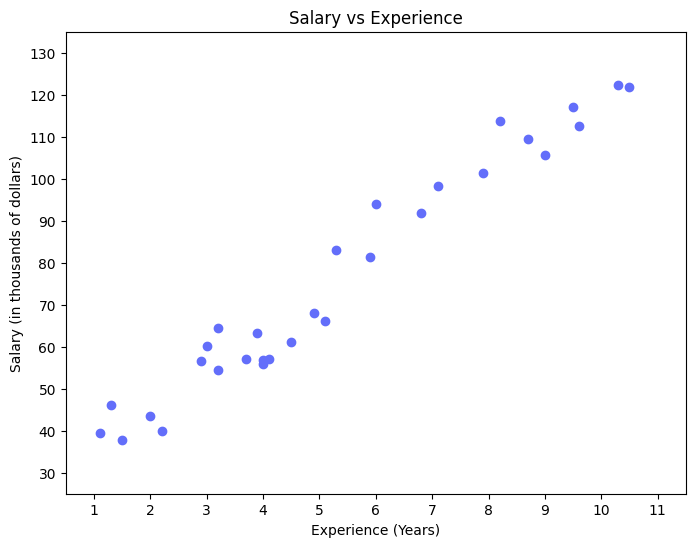

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(data["YearsExperience"], data["Salary"]/1000, c="#636EFA")

ax.set(title="Salary vs Experience",
       xlabel="Experience (Years)", xticks=np.arange(1, 12), xlim=(0.5, 11.5),
       ylabel="Salary (in thousands of dollars)", yticks=np.arange(30, 131, 10), ylim=(25, 135));

From the plot above, we can conclude that a linear relationship exists between the `YearsExperience` and `Salary` columns. Thus, we can construct a simple linear regression model that fits the data. The feature variable is the experience in years and the target variable is salary. Thus, we have a univariate linear regression problem at hand.

## Modelling

Let $x_i$ be the value of the feature variable corresponding to the $i^{\mathrm{th}}$ row. The true value of the target variable is denoted by $y_i$. Since we are constructing a univariate linear regression model $f$, the predicted value for the target variable is given by:

$$
\hat{y}_i=f(x_i)=mx_i+c
$$

where $m$ and $c$ are parameters of the model. They represent the slope and $y$-intercept of the regression line. Optimal values of the parameters should minimise the error between the true and the predicted values of the target variable. Let us try to minimise the Mean Squared Error (MSE) by using the following cost function $J(m,c)$:

$$
J(m,c)=\frac{1}{2n}\sum_{i=1}^n (\hat{y}_i-y_i)^2=\frac{1}{2n}\sum_{i=1}^n (mx_i+c-y_i)^2
$$

where $n$ is the total number of rows.

In [5]:
# Define the model f.
def f(m, c, x):
    return m*x + c

# Define the cost function J.
def J(m, c, x, y, n):
    return np.sum(np.square(f(m, c, x) - y)) / (2*n)

We shall find the best values for the parameters by using the `gradient descent` algorithm. After providing initial values for $m$ and $c$, we keep updating their values till the corresponding cost function reaches a local minimum. This is done through the following transformation:

$$
m = m - \alpha \cdot \partial_m J
$$

$$
c = c - \alpha \cdot \partial_c J
$$

where $\partial_m J$ and $\partial_c J$ are the partial derivatives of $J$. The `learning rate` $\alpha$ controls the step size of the update in the values of the parameters.

In [6]:
# Partial derivative of J with respect to m.
def dJ_dm(m, c, x, y, n):
    return np.sum((f(m, c, x) - y) * x) / n

# Partial derivative of J with respect to c.
def dJ_dc(m, c, x, y, n):
    return np.sum(f(m, c, x) - y) / n

def gradiant_descent(m, c, x, y, alpha, iter_num):
    """
    Employ gradiant descent to find the optimal values for m and c.
    
    Parameters
    ----------
    m : scalar
        initial value for slope of the regression line
    
    c : scalar
        initial value for y-intercept of the regression line
    
    x : array_like
        values of the feature variable
      
    y : array_like
        values of the target variable
      
    alpha : scalar
        value for the learning rate
      
    iter_num : scalar
        number of updates to be performed
      
     Returns
     -------
     tuple
        the pair of optimal values (m,c)
    """
    
    print("Gradiant Descent", 16 * "*", sep="\n")
    
    # number of rows in the dataset.
    n = x.shape[0]
    
    for i in range(1, iter_num+1):
        m -= alpha * dJ_dm(m, c, x, y, n)
        c -= alpha * dJ_dc(m, c, x, y, n)
        if i % 1000 == 0:
            print(f"i: {i:5}\tJ(m,c): {J(m, c, x, y, n)}")
    return m, c

To execute gradiant descent, let us specify the values for the learning rate and the number of times to perform the update (`iter_num`), along with initial values for $m$ and $c$.

In [7]:
# initial values for m and c.
m_init = 0
c_init = 0

# feature values. 
x = data["YearsExperience"]

# target values.
y = data["Salary"]

# value for learning rate.
alpha = 2e-2

# number of times to perform the update.
iter_num = 15000

In [8]:
m, c = gradiant_descent(m_init, c_init, x, y, alpha, iter_num)

Gradiant Descent
****************
i:  1000	J(m,c): 15648005.835395116
i:  2000	J(m,c): 15635478.140312457
i:  3000	J(m,c): 15635475.861555051
i:  4000	J(m,c): 15635475.861140553
i:  5000	J(m,c): 15635475.861140486
i:  6000	J(m,c): 15635475.861140493
i:  7000	J(m,c): 15635475.861140484
i:  8000	J(m,c): 15635475.86114047
i:  9000	J(m,c): 15635475.86114047
i: 10000	J(m,c): 15635475.86114047
i: 11000	J(m,c): 15635475.86114047
i: 12000	J(m,c): 15635475.86114047
i: 13000	J(m,c): 15635475.86114047
i: 14000	J(m,c): 15635475.86114047
i: 15000	J(m,c): 15635475.86114047


In [9]:
print(f"The optimal values of m and c are {m:.4f} and {c:.4f} respectively.")

The optimal values of m and c are 9449.9623 and 25792.2002 respectively.


## Result

The predicted values for the target variable can be obtained from the model $f$.

In [10]:
y_pred = f(m, c, x)

Let us plot the regression line associated with the optimal values of $m$ and $c$. The true values of the target variable are also shown in the plot.

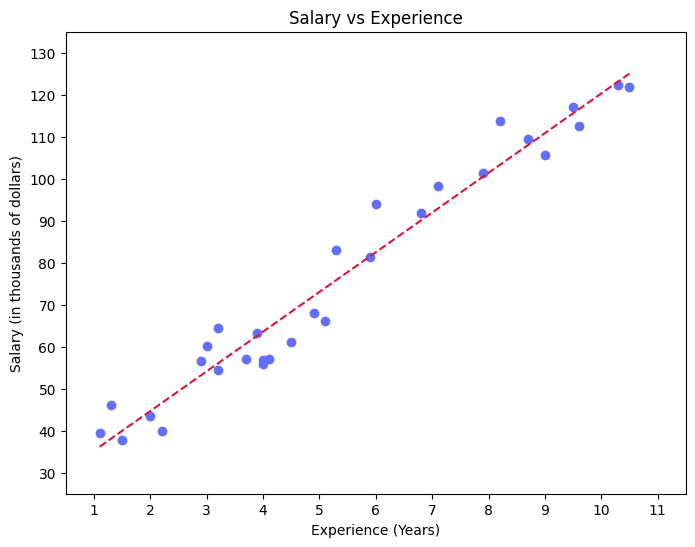

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(data["YearsExperience"], data["Salary"]/1000, c="#636EFA")

ax.plot(x, y_pred/1000, color="crimson", linestyle="--")

ax.set(title="Salary vs Experience",
       xlabel="Experience (Years)", xticks=np.arange(1, 12), xlim=(0.5, 11.5),
       ylabel="Salary (in thousands of dollars)", yticks=np.arange(30, 131, 10), ylim=(25, 135));

Using the simple linear regression model, the salary corresponding to a certain level of experience (measured in years) can be predicted in the following way:

In [12]:
# experience in years.
experience = 3.5

print(f"Salary corresponding to {experience} years of experience is {f(m, c, experience):,.2f} dollars.")

Salary corresponding to 3.5 years of experience is 58,867.07 dollars.
